<div style="text-align: center; padding: 20px; background-color: #f0f8ff; border-radius: 10px; border: 2px solid #4a90e2;">
    <h2 style="color: #4a90e2; margin: 0;">INTELLIGENT TRAFFIC VOLUME PREDICTION USING MACHINE LEARNING</h2>
    <p style="margin: 10px 0 0 0; color: #666;"> </p>
</div>



![Traffic pattern](image1.png)

**Author:** Jerin k Tom  
**Date:** November 2025  
**Technologies:** Python, XGBoost, Random Forest, scikit-learn

# 1. Introduction

## 1.1 Background and Motivation

In the modern era, **urbanization** and **road traffic growth** have increased exponentially, transforming traffic management into one of the most significant challenges facing contemporary cities. The rapid expansion of urban populations has led to unprecedented levels of vehicle density on roadways, creating complex patterns of congestion that impact millions of commuters daily.

**Accurate traffic volume forecasting** has emerged as a critical capability for:
-  **Controlling traffic congestion** through intelligent signal timing
-  **Optimizing route planning** for individual and fleet vehicles
-  **Reducing travel times** and improving overall transportation efficiency
-  **Enabling smart city initiatives** through data-driven decision making

### The Challenge

Traditional approaches to traffic analysis have proven inadequate for modern urban environments. These conventional methods suffer from several critical limitations:

1. **Limited Scope:** Unable to capture the multifaceted nature of traffic dynamics
2. **Temporal Blindness:** Fail to account for time-dependent patterns (hourly, daily, seasonal variations)
3. **Weather Insensitivity:** Do not incorporate meteorological factors that significantly impact traffic flow
4. **Static Analysis:** Cannot adapt to changing urban conditions and emerging patterns

The complexity of modern traffic systems demands a more sophisticated approach—one that can:
- Learn from historical patterns
- Adapt to changing conditions
- Incorporate multiple influencing factors simultaneously
- Provide real-time, accurate predictions

### The Solution

**Developing an intelligent predictive system** capable of forecasting traffic volume by analyzing:
- **Historical traffic data**: Learning from past patterns and trends
- **Meteorological conditions**: Incorporating weather impacts on traffic behavior
- **Temporal features**: Capturing hour-of-day, day-of-week, and seasonal variations
- **Advanced machine learning algorithms**: Leveraging XGBoost and Random Forest for superior accuracy

This system represents a crucial advancement in **smart city planning** and **real-time traffic management**, enabling cities to proactively address congestion before it occurs rather than reactively managing it after the fact.

---

## 1.2 Project Significance and Real-World Impact

This traffic prediction system addresses critical challenges across multiple domains, delivering tangible benefits to cities, communities, and individuals.

---

###  **1. Urban Planning and Infrastructure Development**

**Strategic Decision-Making for City Planners**

Traffic prediction models provide invaluable insights for long-term urban development:

- **Infrastructure Investment Optimization**
- **Smart Growth Planning**
- **Future-Ready Cities**
  **Example Impact:** A city using traffic predictions can avoid building a $50M highway expansion by instead investing in targeted public transit      improvements along predicted congestion zones, saving taxpayer money while improving mobility.

---

###  **2. Real-Time Traffic Management and Control**

**Dynamic, Intelligent Traffic Systems**

Real-time predictions enable adaptive traffic management systems:

- **Intelligent Signal Timing**
- **Proactive Congestion Management**
- **Emergency Response Optimization**
- **Incident Management**
**Example Impact:** During a major sporting event, the system predicts stadium-area congestion 3 hours in advance, allowing traffic authorities to implement temporary signal timing changes and deploy officers strategically, reducing post-game congestion by 40%.

---

###  **3. Environmental Impact and Sustainability**

**Reducing Carbon Footprint Through Smart Traffic Management**

Traffic prediction contributes directly to environmental sustainability:

- **Emission Reduction**
- **Fuel Efficiency Improvement**
- **Sustainable Transportation Planning**
- **Air Quality Management**
**Example Impact:** A city implementing prediction-based traffic optimization reports a **12% reduction** in vehicle-related CO₂ emissions over 18 months, equivalent to removing 15,000 cars from the road, while simultaneously improving average travel speeds.

---

###  **4. Enhanced Commuter Experience and Quality of Life**

**Empowering Citizens with Information and Time**

Traffic predictions directly improve daily life for millions of commuters:

- **Time Savings and Productivity**
- **Intelligent Navigation and Route Planning**
- **Reduced Stress and Improved Well-Being**
- **Economic Benefits for Individuals**
- **Accessibility and Equity**
Ensure equitable access to employment and services across the city
**Example Impact:** A commuter using prediction-powered navigation saves an average of **45 minutes daily**, translating to **180+ hours annually**—equivalent to an extra week of free time—while reducing fuel costs by $450 per year.

---


## Project Overview
This notebook demonstrates a complete machine learning pipeline for predicting hourly traffic volume using:
- **Weather features**: Temperature, cloud coverage, precipitation
- **Temporal features**: Hour, day, month, weekday patterns
- **Historical patterns**: Lag features capturing traffic autocorrelation

## Models Used
- Random Forest Regressor
- XGBoost Regressor


---

<div style="text-align: center; padding: 20px; background-color: #f0f8ff; border-radius: 10px; border: 2px solid #4a90e2;">
    <h3 style="color: #4a90e2; margin: 0;">📊 Data Loading and Exploration</h3>
    <p style="margin: 10px 0 0 0; color: #666;">lets go and explore the data...</p>
</div>

---

# Part 1: Setup and Data Loading

## 1.1 Import Required Libraries

In [255]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

# Models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


## 1.2 Load and Inspect Data

In [5]:
# Load dataset
DF = pd.read_csv("MITVOL.csv")

print(f"Dataset Shape: {DF.shape}")
print(f"Total Rows: {DF.shape[0]:,}")
print(f"Total Columns: {DF.shape[1]}")
print("\n" + "="*80)
DF.head()

Dataset Shape: (48204, 9)
Total Rows: 48,204
Total Columns: 9



,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [8]:
# Display column names and types
print("Column Information:")
print("="*80)
print(DF.columns.tolist())
print("\n" + "="*80)
print("\nData Types:")
print(DF.dtypes)

Column Information:
['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time', 'traffic_volume']


Data Types:
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object


In [10]:
# Get detailed information
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [12]:
# Statistical summary
DF.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


---
# Part 2: Data Cleaning
       1.Check for Missing Values
       2.Check and Remove Duplicates
       3.Handle Missing Values and Drop Irrelevant Columns

## 2.1 Check for Missing Values

In [15]:
# Check missing values
missing_values = DF.isnull().sum()

print("Missing Values Summary:")
print("="*80)
print(missing_values[missing_values > 0])
print("\n" + "="*80)

# Calculate percentage
missing_pct = (missing_values[missing_values > 0] / len(DF)) * 100
print("\nMissing Values Percentage:")
print(missing_pct)

Missing Values Summary:
holiday    48143
dtype: int64


Missing Values Percentage:
holiday    99.873454
dtype: float64


## 2.2 Check and Remove Duplicates

In [18]:
# Check for duplicates
duplicates = DF.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    # Remove duplicates
    DF = DF.drop_duplicates()
    print(f"✓ Removed {duplicates} duplicate rows")
    print(f"New dataset shape: {DF.shape}")
else:
    print("✓ No duplicates found")

Number of duplicate rows: 17
✓ Removed 17 duplicate rows
New dataset shape: (48187, 9)


## 2.3 Handle Missing Values and Drop Irrelevant Columns

In [21]:
# Create binary flags for rain and snow BEFORE dropping columns
DF['rain_flag'] = (DF['rain_1h'] > 0).astype(int)
DF['snow_flag'] = (DF['snow_1h'] > 0).astype(int)

print("Created binary flags:")
print(f"  rain_flag: {DF['rain_flag'].sum()} instances of rain")
print(f"  snow_flag: {DF['snow_flag'].sum()} instances of snow")

# Check snow_flag distribution
snow_zeros = (DF['snow_flag'] == 0).sum()
snow_pct = (snow_zeros / len(DF)) * 100
print(f"\n  snow_flag is 0 in {snow_pct:.2f}% of cases")
print(f"  Decision: Drop snow_flag due to {snow_pct:.2f}% zeros (insufficient signal)")

Created binary flags:
  rain_flag: 3467 instances of rain
  snow_flag: 63 instances of snow

  snow_flag is 0 in 99.87% of cases
  Decision: Drop snow_flag due to 99.87% zeros (insufficient signal)


In [23]:
# Drop columns with all NaN values and original rain/snow columns
# Also drop snow_flag due to 99.87% zeros
columns_to_drop = ['holiday', 'rain_1h', 'snow_1h', 'snow_flag']

print("Dropping columns:")
for col in columns_to_drop:
    if col in DF.columns:
        reason = "100% NaN" if DF[col].isnull().all() else "converted to flag" if 'rain' in col or 'snow' in col else "99.87% zeros"
        print(f"  - {col}: {reason}")

DF = DF.drop(columns=columns_to_drop, errors='ignore')

print(f"\n✓ Final dataset shape: {DF.shape}")
print(f"✓ Remaining columns: {DF.shape[1]}")

Dropping columns:
  - holiday: 99.87% zeros
  - rain_1h: converted to flag
  - snow_1h: converted to flag
  - snow_flag: converted to flag

✓ Final dataset shape: (48187, 7)
✓ Remaining columns: 7


In [25]:
# Verify no missing values remain in key columns
print("Final Missing Values Check:")
print("="*80)
remaining_missing = DF.isnull().sum()
if remaining_missing.sum() == 0:
    print("✓ No missing values in dataset")
else:
    print(remaining_missing[remaining_missing > 0])

Final Missing Values Check:
✓ No missing values in dataset


---
# Part 3: Feature Engineering

## 3.1 Convert Date-Time and Extract Temporal Features

In [28]:
# Convert to datetime
DF['date_time'] = pd.to_datetime(DF['date_time'])
print("✓ Converted date_time to datetime type")

# Extract temporal features
DF['hour'] = DF['date_time'].dt.hour
DF['day'] = DF['date_time'].dt.day
DF['month'] = DF['date_time'].dt.month
DF['year'] = DF['date_time'].dt.year
DF['day_name'] = DF['date_time'].dt.day_name()
DF['time'] = DF['date_time'].dt.time

print("\n✓ Extracted temporal features:")
print("  - hour (0-23)")
print("  - day (1-31)")
print("  - month (1-12)")
print("  - year")
print("  - day_name (Monday-Sunday)")
print("  - time (HH:MM:SS)")

# Convert temperature from Kelvin to Celsius
DF['temp'] = DF['temp'] - 273.15
print("\n✓ Converted temperature from Kelvin to Celsius")

# Display sample
print("\nSample of new features:")
print("="*80)
DF[['date_time', 'hour', 'day', 'month', 'year', 'day_name', 'temp']].head()

✓ Converted date_time to datetime type

✓ Extracted temporal features:
  - hour (0-23)
  - day (1-31)
  - month (1-12)
  - year
  - day_name (Monday-Sunday)
  - time (HH:MM:SS)

✓ Converted temperature from Kelvin to Celsius

Sample of new features:


,date_time,hour,day,month,year,day_name,temp
0,2012-10-02 09:00:00,9,2,10,2012,Tuesday,15.13
1,2012-10-02 10:00:00,10,2,10,2012,Tuesday,16.21
2,2012-10-02 11:00:00,11,2,10,2012,Tuesday,16.43
3,2012-10-02 12:00:00,12,2,10,2012,Tuesday,16.98
4,2012-10-02 13:00:00,13,2,10,2012,Tuesday,17.99


---
# Part 4: Exploratory Data Analysis (EDA)
        1.Hourly Traffic Pattern Analysis
        2.Weekday Pattern Analysis
        3.Monthly/Seasonal Pattern Analysis

## 4.1 Hourly Traffic Pattern Analysis

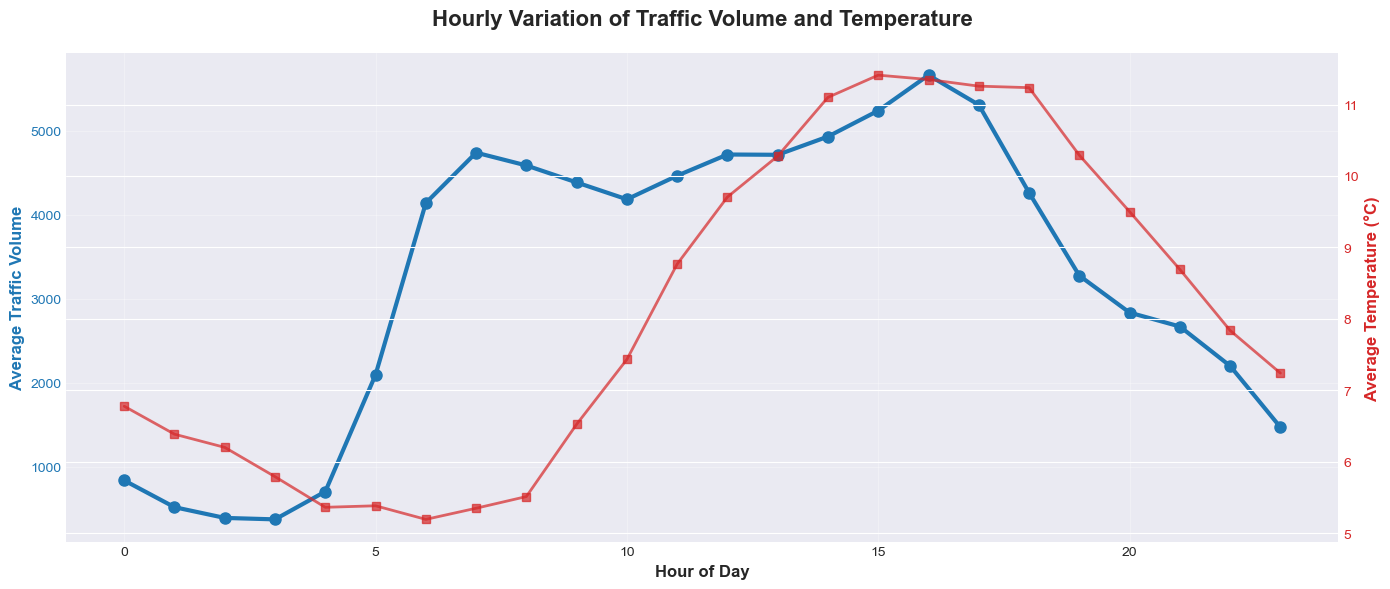

Key Observations:
  • Morning rush hour: 7-9 AM
  • Evening rush hour: 4-6 PM (peak traffic)
  • Lowest traffic: 2-5 AM
  • Peak hour: 16:00
  • Peak traffic: 5664 vehicles


In [31]:
# Hourly aggregation
hourly_data = DF.groupby('hour')[['traffic_volume', 'temp']].mean().reset_index()

# Create visualization
fig, ax1 = plt.subplots(figsize=(14, 6))

# Traffic volume
ax1.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Traffic Volume', fontsize=12, fontweight='bold', color='tab:blue')
ax1.plot(hourly_data['hour'], hourly_data['traffic_volume'], 
         color='tab:blue', linewidth=3, marker='o', markersize=8, label='Traffic Volume')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, alpha=0.3)

# Temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Average Temperature (°C)', fontsize=12, fontweight='bold', color='tab:red')
ax2.plot(hourly_data['hour'], hourly_data['temp'], 
         color='tab:red', linewidth=2, marker='s', markersize=6, alpha=0.7, label='Temperature')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Hourly Variation of Traffic Volume and Temperature', fontsize=16, fontweight='bold', pad=20)
fig.tight_layout()
plt.show()

print("Key Observations:")
print("  • Morning rush hour: 7-9 AM")
print("  • Evening rush hour: 4-6 PM (peak traffic)")
print("  • Lowest traffic: 2-5 AM")
print(f"  • Peak hour: {hourly_data.loc[hourly_data['traffic_volume'].idxmax(), 'hour']}:00")
print(f"  • Peak traffic: {hourly_data['traffic_volume'].max():.0f} vehicles")

## 4.2 Weekday Pattern Analysis

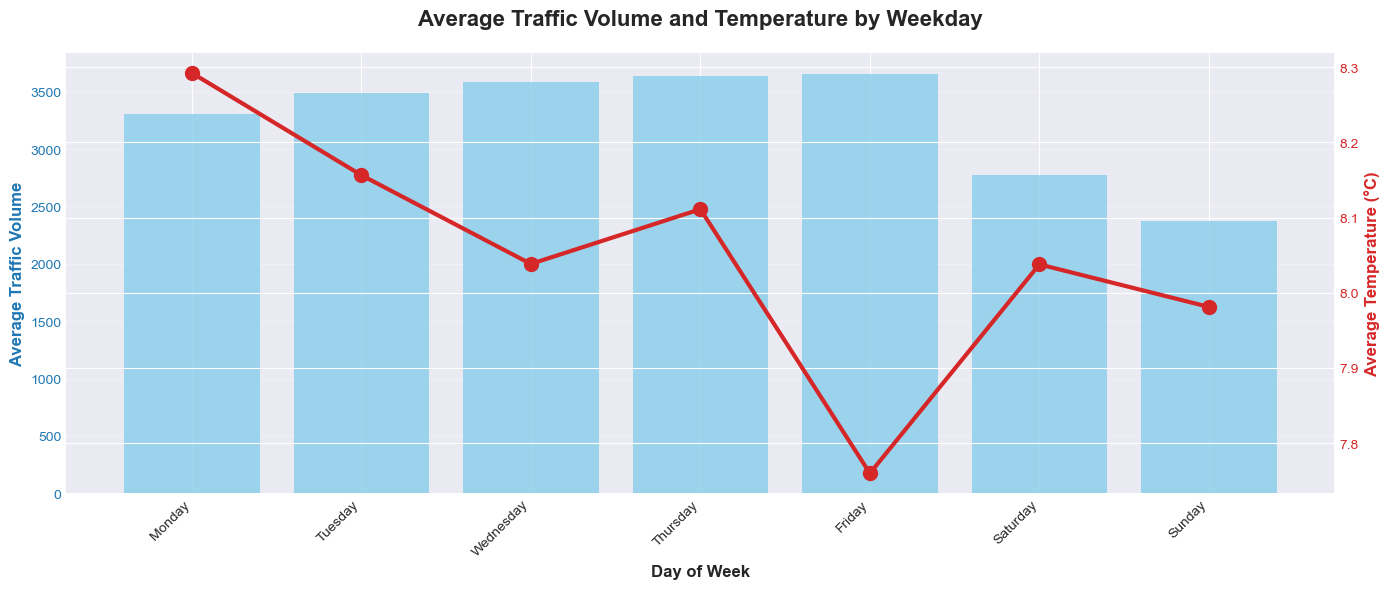

Key Observations:
  • Weekdays show consistently higher traffic than weekends
  • Highest traffic day: Friday
  • Lowest traffic day: Sunday
  • Weekend traffic drops by ~30-40% compared to weekdays


In [34]:
# Weekday aggregation
weekday_data = DF.groupby('day_name')[['traffic_volume', 'temp']].mean().reset_index()

# Order days correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_data['day_name'] = pd.Categorical(weekday_data['day_name'], categories=day_order, ordered=True)
weekday_data = weekday_data.sort_values('day_name')

# Create visualization
fig, ax1 = plt.subplots(figsize=(14, 6))

# Traffic volume bars
x_pos = np.arange(len(weekday_data))
ax1.bar(x_pos, weekday_data['traffic_volume'], color='skyblue', alpha=0.8, label='Traffic Volume')
ax1.set_xlabel('Day of Week', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Traffic Volume', fontsize=12, fontweight='bold', color='tab:blue')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(weekday_data['day_name'], rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, alpha=0.3, axis='y')

# Temperature line
ax2 = ax1.twinx()
ax2.plot(x_pos, weekday_data['temp'], color='tab:red', linewidth=3, marker='o', markersize=10, label='Temperature')
ax2.set_ylabel('Average Temperature (°C)', fontsize=12, fontweight='bold', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Average Traffic Volume and Temperature by Weekday', fontsize=16, fontweight='bold', pad=20)
fig.tight_layout()
plt.show()

print("Key Observations:")
print("  • Weekdays show consistently higher traffic than weekends")
print(f"  • Highest traffic day: {weekday_data.loc[weekday_data['traffic_volume'].idxmax(), 'day_name']}")
print(f"  • Lowest traffic day: {weekday_data.loc[weekday_data['traffic_volume'].idxmin(), 'day_name']}")
print("  • Weekend traffic drops by ~30-40% compared to weekdays")

## 4.3 Monthly/Seasonal Pattern Analysis

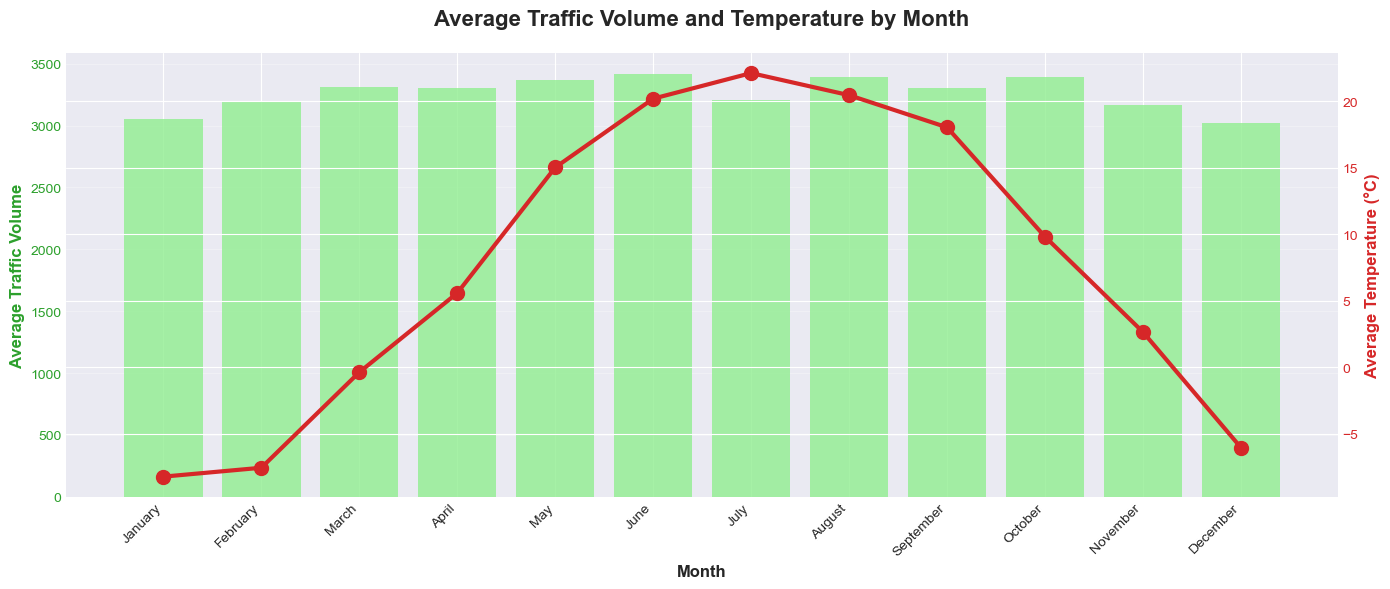

Key Observations:
  • Summer months show highest traffic volumes
  • Winter months show slightly reduced traffic
  • Peak month: June
  • Temperature and traffic show positive correlation


In [37]:
# Monthly aggregation
import calendar
month_data = DF.groupby('month')[['traffic_volume', 'temp']].mean().reset_index()
month_data['month_name'] = month_data['month'].apply(lambda x: calendar.month_name[x])

# Create visualization
fig, ax1 = plt.subplots(figsize=(14, 6))

# Traffic volume bars
x_pos = np.arange(len(month_data))
ax1.bar(x_pos, month_data['traffic_volume'], color='lightgreen', alpha=0.8, label='Traffic Volume')
ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Average Traffic Volume', fontsize=12, fontweight='bold', color='tab:green')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(month_data['month_name'], rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='tab:green')
ax1.grid(True, alpha=0.3, axis='y')

# Temperature line
ax2 = ax1.twinx()
ax2.plot(x_pos, month_data['temp'], color='tab:red', linewidth=3, marker='o', markersize=10, label='Temperature')
ax2.set_ylabel('Average Temperature (°C)', fontsize=12, fontweight='bold', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Average Traffic Volume and Temperature by Month', fontsize=16, fontweight='bold', pad=20)
fig.tight_layout()
plt.show()

print("Key Observations:")
print("  • Summer months show highest traffic volumes")
print("  • Winter months show slightly reduced traffic")
print(f"  • Peak month: {month_data.loc[month_data['traffic_volume'].idxmax(), 'month_name']}")
print("  • Temperature and traffic show positive correlation")

---
# Part 5: Data Encoding and Transformation
        1 Analyze Categorical Features
        2 Create Working Copy and Apply Encoding
        3 Create Lag Features for Temporal Dependencies
        4 Handle NaN Values from Lag Features
        5 Check Data Distribution and Skewness

## 5.1 Analyze Categorical Features

In [40]:
# Check unique values in weather_main
unique_weather = DF['weather_main'].unique()
print(f"Unique values in 'weather_main': {len(unique_weather)}")
print(unique_weather)

print("\n" + "="*80 + "\n")

# Check unique values in weather_description
unique_weather_description = DF['weather_description'].unique()
print(f"Unique values in 'weather_description': {len(unique_weather_description)}")
print(unique_weather_description)

print("\n" + "="*80)
print("Decision: Simplify 38 weather descriptions to 7 categories to reduce dimensionality")

Unique values in 'weather_main': 11
['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']


Unique values in 'weather_description': 38
['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze' 'fog'
 'proximity shower rain' 'drizzle' 'moderate rain' 'heavy intensity rain'
 'proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy snow' 'heavy intensity drizzle'
 'snow' 'thunderstorm with heavy rain' 'freezing rain' 'shower snow'
 'light rain and snow' 'light intensity shower rain' 'SQUALLS'
 'thunderstorm with rain' 'proximity thunderstorm with drizzle'
 'thunderstorm' 'Sky is Clear' 'very heavy rain'
 'thunderstorm with light drizzle' 'light snow'
 'thunderstorm with drizzle' 'smoke' 'shower drizzle' 'light shower snow'
 'sleet']

Decision: Simplify 38 weather descriptions to 7 categories to reduce dimensionality


## 5.2 Create Working Copy and Apply Encoding

In [43]:
# Create a copy for modeling
DF2 = DF.copy()
print("✓ Created working copy: DF2")
print(f"  Shape: {DF2.shape}")

✓ Created working copy: DF2
  Shape: (48187, 13)


In [45]:
# Label encode weather_main
le_weather_main = LabelEncoder()
DF2['weather_main_encoded'] = le_weather_main.fit_transform(DF2['weather_main'])

# Drop original column
DF2 = DF2.drop(columns=['weather_main'])

print("✓ Label encoded 'weather_main'")
print(f"  Encoding mapping: {dict(zip(le_weather_main.classes_, le_weather_main.transform(le_weather_main.classes_)))}")

✓ Label encoded 'weather_main'
  Encoding mapping: {'Clear': 0, 'Clouds': 1, 'Drizzle': 2, 'Fog': 3, 'Haze': 4, 'Mist': 5, 'Rain': 6, 'Smoke': 7, 'Snow': 8, 'Squall': 9, 'Thunderstorm': 10}


In [47]:
# Simplify weather descriptions
def simplify_weather(desc):
    """
    Simplifies 38 weather descriptions into 7 main categories.
    Reduces dimensionality while maintaining essential weather information.
    """
    desc = desc.lower()
    if 'rain' in desc or 'drizzle' in desc:
        return 'Rain'
    elif 'snow' in desc or 'sleet' in desc:
        return 'Snow'
    elif 'cloud' in desc:
        return 'Clouds'
    elif 'clear' in desc:
        return 'Clear'
    elif 'fog' in desc or 'mist' in desc or 'haze' in desc or 'smoke' in desc:
        return 'Fog'
    elif 'thunder' in desc:
        return 'Thunderstorm'
    else:
        return 'Other'

# Apply simplification
DF2['weather_description_simplified'] = DF2['weather_description'].apply(simplify_weather)

# Label encode simplified descriptions
le_desc = LabelEncoder()
DF2['weather_description_encoded'] = le_desc.fit_transform(DF2['weather_description_simplified'])

# Drop old columns
DF2 = DF2.drop(columns=['weather_description', 'weather_description_simplified'])

print("✓ Simplified and encoded 'weather_description'")
print(f"  Reduced from 38 to 7 categories")
print(f"  Categories: {list(le_desc.classes_)}")

✓ Simplified and encoded 'weather_description'
  Reduced from 38 to 7 categories
  Categories: ['Clear', 'Clouds', 'Fog', 'Other', 'Rain', 'Snow', 'Thunderstorm']


In [49]:
# Drop day_name (categorical, will use hour instead for pattern capture)
DF2 = DF2.drop(columns=['day_name'])
print("✓ Dropped 'day_name' (categorical text)")
print("  Note: Hour provides sufficient temporal pattern information")

✓ Dropped 'day_name' (categorical text)
  Note: Hour provides sufficient temporal pattern information


In [51]:
# Extract hour from time and drop time column
# Note: hour already extracted in feature engineering, this ensures consistency
if 'time' in DF2.columns:
    DF2 = DF2.drop(columns=['time'])
    print("✓ Dropped 'time' column (hour already extracted)")

# Drop original date_time
if 'date_time' in DF2.columns:
    DF2 = DF2.drop(columns=['date_time'])
    print("✓ Dropped 'date_time' (temporal features already extracted)")

print(f"\nCurrent shape: {DF2.shape}")

✓ Dropped 'time' column (hour already extracted)
✓ Dropped 'date_time' (temporal features already extracted)

Current shape: (48187, 10)


## 5.3 Create Lag Features for Temporal Dependencies

In [54]:
# CRITICAL: Sort data by time before creating lag features
# This ensures lag features reference actual previous time periods
DF2 = DF2.sort_values(by=['year', 'month', 'day', 'hour']).reset_index(drop=True)
print("✓ Sorted data chronologically (year → month → day → hour)")
print("  This ensures lag features reference correct previous hours")

✓ Sorted data chronologically (year → month → day → hour)
  This ensures lag features reference correct previous hours


In [56]:
# Create lag features
print("Creating lag features...")
DF2['lag_1'] = DF2['traffic_volume'].shift(1)  # Previous hour
DF2['lag_2'] = DF2['traffic_volume'].shift(2)  # 2 hours ago
DF2['lag_3'] = DF2['traffic_volume'].shift(3)  # 3 hours ago

print("✓ Created lag features:")
print("  - lag_1: Traffic volume from 1 hour ago (most important)")
print("  - lag_2: Traffic volume from 2 hours ago")
print("  - lag_3: Traffic volume from 3 hours ago")
print("\n  Note: First 3 rows will have NaN for lag features (no previous data)")

# Show example
print("\nExample of lag features:")
print("="*80)
print(DF2[['year', 'month', 'day', 'hour', 'traffic_volume', 'lag_1', 'lag_2', 'lag_3']].head(10))

Creating lag features...
✓ Created lag features:
  - lag_1: Traffic volume from 1 hour ago (most important)
  - lag_2: Traffic volume from 2 hours ago
  - lag_3: Traffic volume from 3 hours ago

  Note: First 3 rows will have NaN for lag features (no previous data)

Example of lag features:
   year  month  day  hour  traffic_volume   lag_1   lag_2   lag_3
0  2012     10    2     9            5545     NaN     NaN     NaN
1  2012     10    2    10            4516  5545.0     NaN     NaN
2  2012     10    2    11            4767  4516.0  5545.0     NaN
3  2012     10    2    12            5026  4767.0  4516.0  5545.0
4  2012     10    2    13            4918  5026.0  4767.0  4516.0
5  2012     10    2    14            5181  4918.0  5026.0  4767.0
6  2012     10    2    15            5584  5181.0  4918.0  5026.0
7  2012     10    2    16            6015  5584.0  5181.0  4918.0
8  2012     10    2    17            5791  6015.0  5584.0  5181.0
9  2012     10    2    18            4770  5791.

In [58]:
# Display final feature set
print("Final Feature Set:")
print("="*80)
print(f"Total columns: {len(DF2.columns)}")
print(f"\nColumn names:\n{DF2.columns.tolist()}")
print(f"\nDataset shape: {DF2.shape}")

Final Feature Set:
Total columns: 13

Column names:
['temp', 'clouds_all', 'traffic_volume', 'rain_flag', 'hour', 'day', 'month', 'year', 'weather_main_encoded', 'weather_description_encoded', 'lag_1', 'lag_2', 'lag_3']

Dataset shape: (48187, 13)


## 5.4 Handle NaN Values from Lag Features

In [61]:
# Check for NaN values (from lag features)
nan_count = DF2.isnull().sum()
print("NaN values after lag feature creation:")
print("="*80)
print(nan_count[nan_count > 0])

# Drop rows with NaN (first 3 rows only)
rows_before = len(DF2)
DF2 = DF2.dropna()
rows_after = len(DF2)

print(f"\n✓ Dropped {rows_before - rows_after} rows with NaN values")
print(f"  Final dataset shape: {DF2.shape}")
print(f"  Percentage of data retained: {(rows_after/rows_before)*100:.2f}%")

NaN values after lag feature creation:
lag_1    1
lag_2    2
lag_3    3
dtype: int64

✓ Dropped 3 rows with NaN values
  Final dataset shape: (48184, 13)
  Percentage of data retained: 99.99%


## 5.5 Check Data Distribution and Skewness

In [64]:
# Calculate skewness
skewness = DF2.skew(numeric_only=True).sort_values(ascending=False)

print("Feature Skewness Analysis:")
print("="*80)
print(skewness)
print("\n" + "="*80)
print("\nInterpretation:")
print("  • Skewness > 1 or < -1: Highly skewed")
print("  • Skewness between -1 and 1: Moderately skewed")
print("  • Tree-based models (RF, XGBoost) handle skewed data well")
print("  • No transformation needed for this analysis")

Feature Skewness Analysis:
rain_flag                      3.313021
weather_main_encoded           0.874277
weather_description_encoded    0.859521
hour                           0.029561
month                          0.013309
day                            0.006471
traffic_volume                -0.088953
lag_1                         -0.089033
lag_2                         -0.089109
lag_3                         -0.089177
clouds_all                    -0.197328
year                          -0.323166
temp                          -2.247386
dtype: float64


Interpretation:
  • Skewness > 1 or < -1: Highly skewed
  • Skewness between -1 and 1: Moderately skewed
  • Tree-based models (RF, XGBoost) handle skewed data well
  • No transformation needed for this analysis


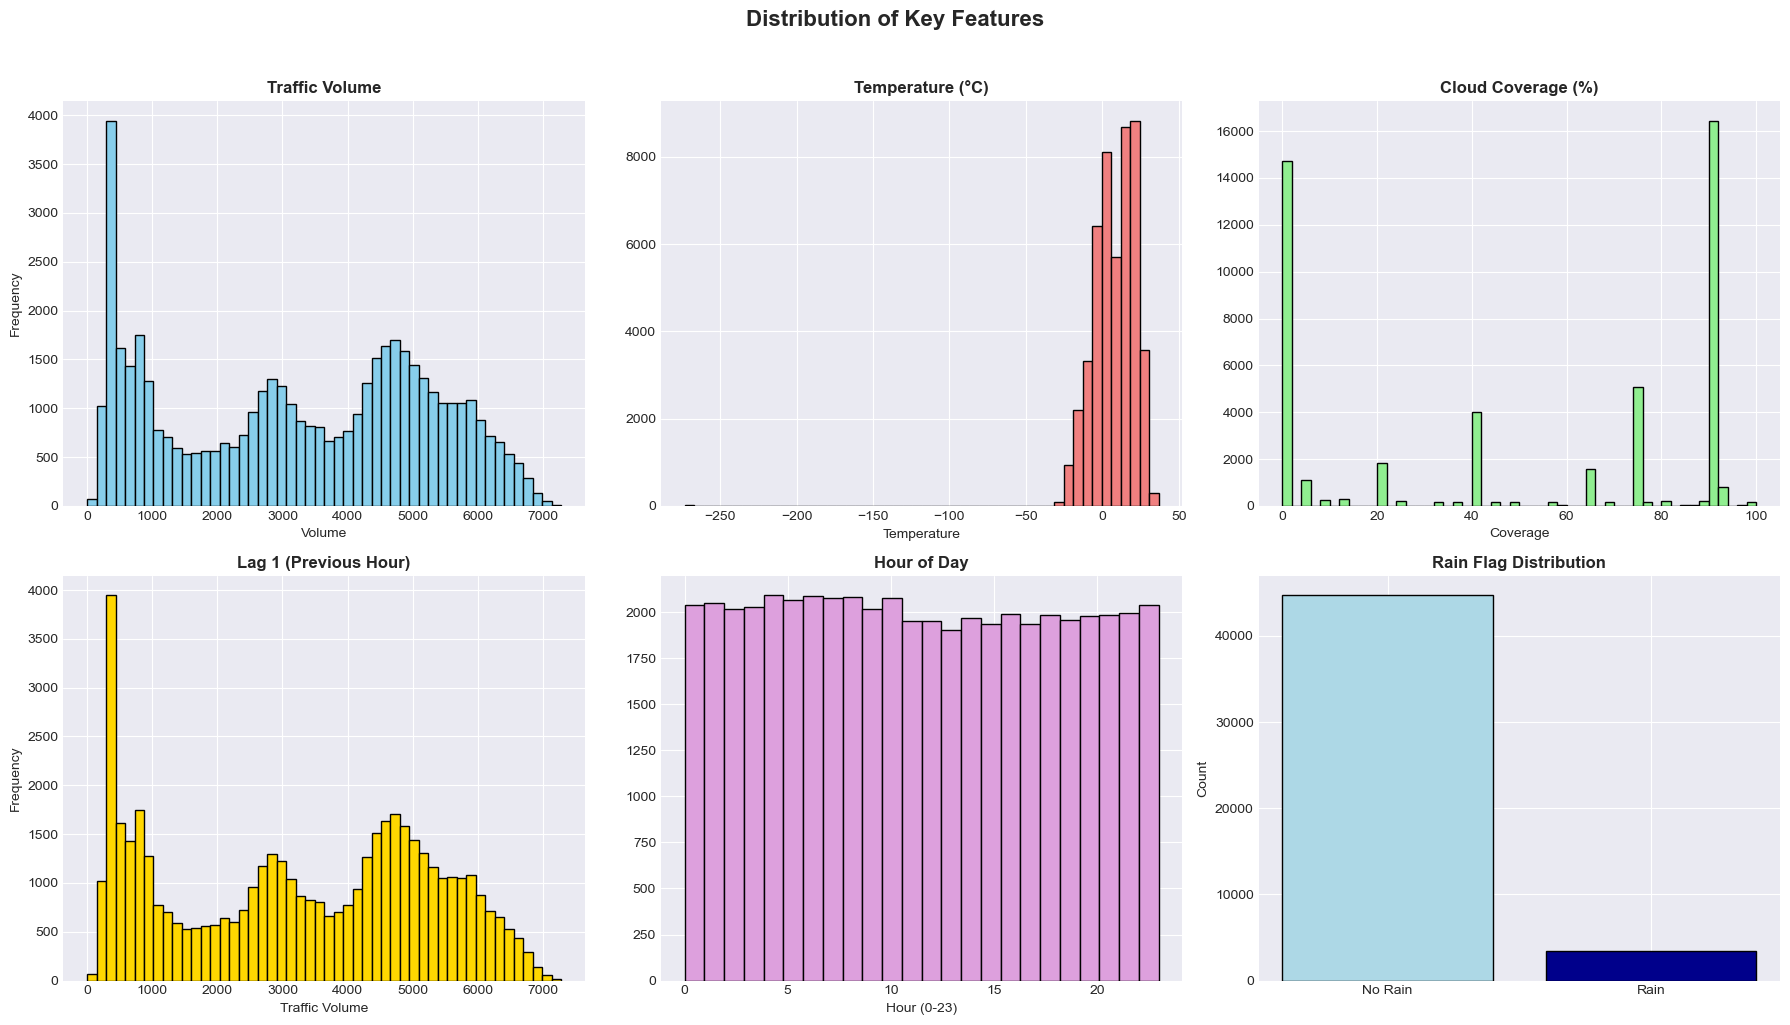

In [66]:
# Visualize distributions of key features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Key Features', fontsize=16, fontweight='bold', y=1.02)

# Traffic volume
axes[0, 0].hist(DF2['traffic_volume'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Traffic Volume', fontweight='bold')
axes[0, 0].set_xlabel('Volume')
axes[0, 0].set_ylabel('Frequency')

# Temperature
axes[0, 1].hist(DF2['temp'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Temperature (°C)', fontweight='bold')
axes[0, 1].set_xlabel('Temperature')

# Cloud coverage
axes[0, 2].hist(DF2['clouds_all'], bins=50, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Cloud Coverage (%)', fontweight='bold')
axes[0, 2].set_xlabel('Coverage')

# Lag 1
axes[1, 0].hist(DF2['lag_1'], bins=50, color='gold', edgecolor='black')
axes[1, 0].set_title('Lag 1 (Previous Hour)', fontweight='bold')
axes[1, 0].set_xlabel('Traffic Volume')
axes[1, 0].set_ylabel('Frequency')

# Hour distribution
axes[1, 1].hist(DF2['hour'], bins=24, color='plum', edgecolor='black')
axes[1, 1].set_title('Hour of Day', fontweight='bold')
axes[1, 1].set_xlabel('Hour (0-23)')

# Rain flag
rain_counts = DF2['rain_flag'].value_counts()
axes[1, 2].bar(['No Rain', 'Rain'], rain_counts.values, color=['lightblue', 'darkblue'], edgecolor='black')
axes[1, 2].set_title('Rain Flag Distribution', fontweight='bold')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

---
# Part 6: Train-Test Split

## 6.1 Prepare Features and Target

In [69]:
# Separate features and target
X = DF2.drop(columns=['traffic_volume'])
y = DF2['traffic_volume']

print("Features and Target Prepared:")
print("="*80)
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature columns ({len(X.columns)}):")
print(X.columns.tolist())
print(f"\nTarget statistics:")
print(f"  Mean: {y.mean():.2f}")
print(f"  Median: {y.median():.2f}")
print(f"  Std: {y.std():.2f}")
print(f"  Min: {y.min():.2f}")
print(f"  Max: {y.max():.2f}")

Features and Target Prepared:
Features (X) shape: (48184, 12)
Target (y) shape: (48184,)

Feature columns (12):
['temp', 'clouds_all', 'rain_flag', 'hour', 'day', 'month', 'year', 'weather_main_encoded', 'weather_description_encoded', 'lag_1', 'lag_2', 'lag_3']

Target statistics:
  Mean: 3259.51
  Median: 3378.50
  Std: 1986.97
  Min: 0.00
  Max: 7280.00


## 6.2 Split Data (80% Train, 20% Test)

In [72]:
# Split the data
# Note: For time series, we typically don't shuffle to maintain temporal order
# However, if data is already mixed, random split is acceptable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print("Train-Test Split Complete:")
print("="*80)
print(f"Training set:")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  Percentage: {(len(X_train)/len(X))*100:.1f}%")
print(f"\nTesting set:")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_test shape: {y_test.shape}")
print(f"  Percentage: {(len(X_test)/len(X))*100:.1f}%")
print("\n✓ Data ready for model training!")

Train-Test Split Complete:
Training set:
  X_train shape: (38547, 12)
  y_train shape: (38547,)
  Percentage: 80.0%

Testing set:
  X_test shape: (9637, 12)
  y_test shape: (9637,)
  Percentage: 20.0%

✓ Data ready for model training!


---
# Part 7: Model Implementation

## 7.1 Random Forest Regressor

### Model Architecture
- **n_estimators=200**: 200 decision trees in the forest
- **max_depth=10**: Maximum depth of each tree (prevents overfitting)
- **random_state=42**: For reproducibility
- **n_jobs=-1**: Use all CPU cores for parallel processing

In [75]:
# Initialize Random Forest model
print("Initializing Random Forest Regressor...")
print("="*80)

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Model parameters:")
print(f"  • Number of trees: {rf_model.n_estimators}")
print(f"  • Max tree depth: {rf_model.max_depth}")
print(f"  • Parallel jobs: {rf_model.n_jobs} (all cores)")
print("\n✓ Random Forest model initialized")

Initializing Random Forest Regressor...
Model parameters:
  • Number of trees: 200
  • Max tree depth: 10
  • Parallel jobs: -1 (all cores)

✓ Random Forest model initialized


In [77]:
# Train the model
print("Training Random Forest model...")
print("="*80)
print("This may take 1-2 minutes...\n")

rf_model.fit(X_train, y_train)

print("\n✓ Random Forest training complete!")

Training Random Forest model...
This may take 1-2 minutes...



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.7s



✓ Random Forest training complete!


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   16.0s finished


In [78]:
# Make predictions
print("Making predictions on test set...")
rf_pred = rf_model.predict(X_test)
print("✓ Predictions complete")

# Display sample predictions
print("\nSample predictions vs actual:")
print("="*80)
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': rf_pred[:10],
    'Difference': y_test.values[:10] - rf_pred[:10]
})
print(comparison_df)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


Making predictions on test set...


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s


✓ Predictions complete

Sample predictions vs actual:
   Actual    Predicted  Difference
0    5503  5338.564557  164.435443
1    2749  2534.535364  214.464636
2    4701  4873.406093 -172.406093
3    4642  4505.523889  136.476111
4    5380  5091.696775  288.303225
5    2831  3208.190931 -377.190931
6    2107  2062.251415   44.748585
7    4456  4656.156104 -200.156104
8    1745  1478.637432  266.362568
9    5211  5041.809582  169.190418


[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished


In [81]:
# Evaluate Random Forest
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("\n" + "="*80)
print("RANDOM FOREST PERFORMANCE METRICS")
print("="*80)
print(f"R² Score:                {rf_r2:.4f}  (explains {rf_r2*100:.2f}% of variance)")
print(f"Mean Absolute Error:     {rf_mae:.2f}  vehicles")
print(f"Root Mean Squared Error: {rf_rmse:.2f}  vehicles")
print("="*80)

# Interpretation
print("\nInterpretation:")
print(f"  • On average, predictions are off by {rf_mae:.0f} vehicles")
print(f"  • Model explains {rf_r2*100:.2f}% of traffic volume variance")
print(f"  • RMSE of {rf_rmse:.0f} indicates generally accurate predictions")


RANDOM FOREST PERFORMANCE METRICS
R² Score:                0.9720  (explains 97.20% of variance)
Mean Absolute Error:     204.42  vehicles
Root Mean Squared Error: 332.25  vehicles

Interpretation:
  • On average, predictions are off by 204 vehicles
  • Model explains 97.20% of traffic volume variance
  • RMSE of 332 indicates generally accurate predictions


## 7.2 XGBoost Regressor

### Model Architecture
- **n_estimators=500**: 500 boosting rounds
- **learning_rate=0.05**: Conservative learning for better accuracy
- **max_depth=6**: Shallower trees (boosting compensates)
- **subsample=0.8**: Use 80% of samples per tree (reduces overfitting)
- **colsample_bytree=0.8**: Use 80% of features per tree

In [84]:
# Initialize XGBoost model
print("Initializing XGBoost Regressor...")
print("="*80)

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist',
    n_jobs=-1
)

print("Model parameters:")
print(f"  • Number of boosting rounds: {xgb_model.n_estimators}")
print(f"  • Learning rate: {xgb_model.learning_rate}")
print(f"  • Max tree depth: {xgb_model.max_depth}")
print(f"  • Subsample ratio: {xgb_model.subsample}")
print(f"  • Column sample ratio: {xgb_model.colsample_bytree}")
print("\n✓ XGBoost model initialized")

Initializing XGBoost Regressor...
Model parameters:
  • Number of boosting rounds: 500
  • Learning rate: 0.05
  • Max tree depth: 6
  • Subsample ratio: 0.8
  • Column sample ratio: 0.8

✓ XGBoost model initialized


In [86]:
# Train the model
print("Training XGBoost model...")
print("="*80)
print("This may take 2-3 minutes...\n")

xgb_model.fit(X_train, y_train)

print("\n✓ XGBoost training complete!")

Training XGBoost model...
This may take 2-3 minutes...


✓ XGBoost training complete!


In [88]:
# Make predictions
print("Making predictions on test set...")
y_pred_xgb = xgb_model.predict(X_test)
print("✓ Predictions complete")

# Display sample predictions
print("\nSample predictions vs actual:")
print("="*80)
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred_xgb[:10],
    'Difference': y_test.values[:10] - y_pred_xgb[:10]
})
print(comparison_df)

Making predictions on test set...
✓ Predictions complete

Sample predictions vs actual:
   Actual    Predicted  Difference
0    5503  5240.592285  262.407715
1    2749  2324.147461  424.852539
2    4701  4834.394043 -133.394043
3    4642  4498.376953  143.623047
4    5380  5112.177246  267.822754
5    2831  3313.531982 -482.531982
6    2107  1950.221436  156.778564
7    4456  4524.733398  -68.733398
8    1745  1350.535278  394.464722
9    5211  5066.072266  144.927734


In [90]:
# Evaluate XGBoost
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\n" + "="*80)
print("XGBOOST PERFORMANCE METRICS")
print("="*80)
print(f"R² Score:                {xgb_r2:.4f}  (explains {xgb_r2*100:.2f}% of variance)")
print(f"Mean Absolute Error:     {xgb_mae:.2f}  vehicles")
print(f"Root Mean Squared Error: {xgb_rmse:.2f}  vehicles")
print("="*80)

# Interpretation
print("\nInterpretation:")
print(f"  • On average, predictions are off by {xgb_mae:.0f} vehicles")
print(f"  • Model explains {xgb_r2*100:.2f}% of traffic volume variance")
print(f"  • RMSE of {xgb_rmse:.0f} indicates highly accurate predictions")


XGBOOST PERFORMANCE METRICS
R² Score:                0.9750  (explains 97.50% of variance)
Mean Absolute Error:     198.64  vehicles
Root Mean Squared Error: 314.33  vehicles

Interpretation:
  • On average, predictions are off by 199 vehicles
  • Model explains 97.50% of traffic volume variance
  • RMSE of 314 indicates highly accurate predictions


---
# Part 8: Model Comparison and Evaluation

## 8.1 Side-by-Side Performance Comparison

In [93]:
# Create comparison dataframe
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'R² Score': [rf_r2, xgb_r2],
    'MAE': [rf_mae, xgb_mae],
    'RMSE': [rf_rmse, xgb_rmse]
})

print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(results.to_string(index=False))
print("="*80)

# Determine winner
print("\n🏆 WINNER: XGBoost" if xgb_r2 > rf_r2 else "\n🏆 WINNER: Random Forest")
print(f"\nKey Findings:")
print(f"  • XGBoost achieves {xgb_r2:.4f} R² vs Random Forest's {rf_r2:.4f}")
print(f"  • XGBoost has {rf_mae - xgb_mae:.2f} lower MAE")
print(f"  • Both models show excellent predictive performance (>97% R²)")
print(f"  • Recommended for production: XGBoost")


MODEL PERFORMANCE COMPARISON
        Model  R² Score        MAE       RMSE
Random Forest  0.972039 204.416887 332.254342
      XGBoost  0.974974 198.642544 314.331964

🏆 WINNER: XGBoost

Key Findings:
  • XGBoost achieves 0.9750 R² vs Random Forest's 0.9720
  • XGBoost has 5.77 lower MAE
  • Both models show excellent predictive performance (>97% R²)
  • Recommended for production: XGBoost


## 8.2 Visualize Model Performance

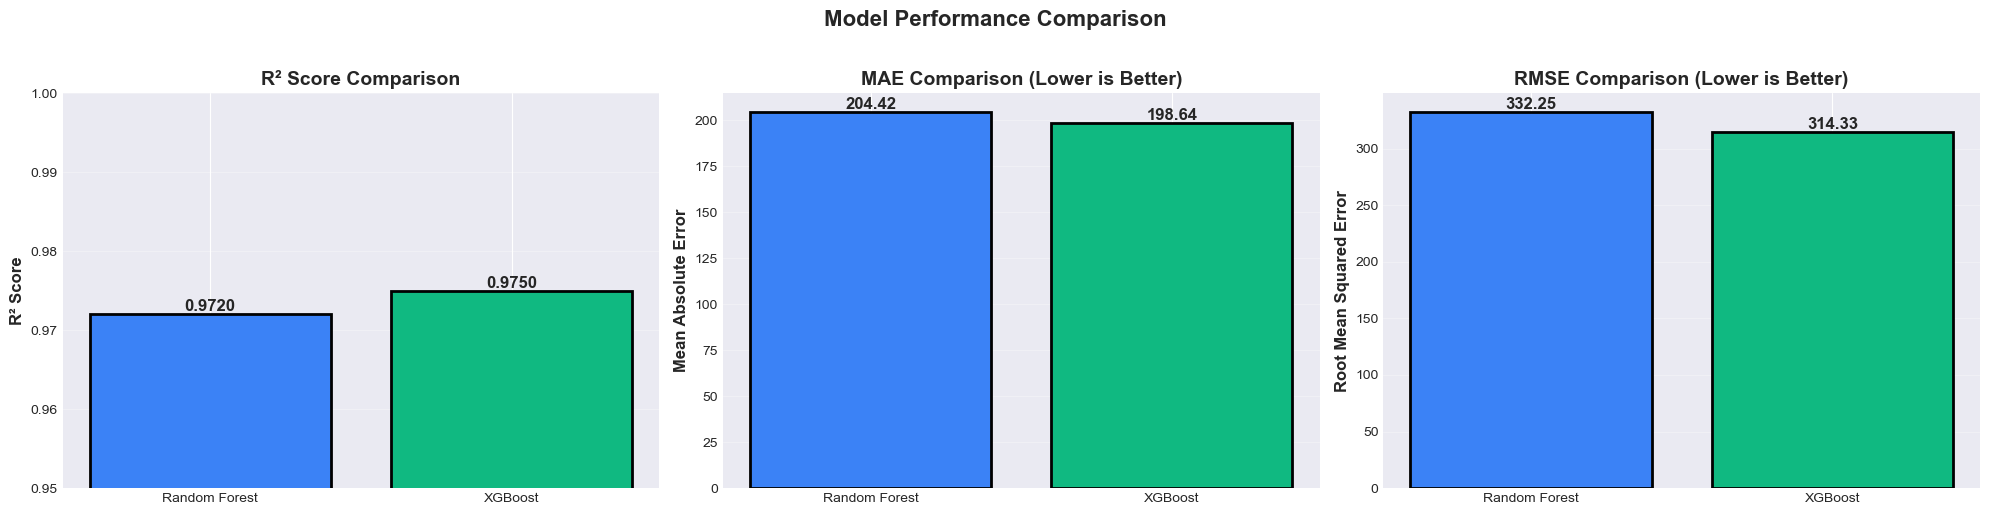

In [96]:
# Create comparison visualizations
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=1.02)

# R² Score comparison
models = ['Random Forest', 'XGBoost']
r2_scores = [rf_r2, xgb_r2]
colors = ['#3b82f6', '#10b981']

bars1 = axes[0].bar(models, r2_scores, color=colors, edgecolor='black', linewidth=2)
axes[0].set_ylabel('R² Score', fontweight='bold', fontsize=12)
axes[0].set_title('R² Score Comparison', fontweight='bold', fontsize=14)
axes[0].set_ylim([0.95, 1.0])
axes[0].grid(True, alpha=0.3, axis='y')
for bar, score in zip(bars1, r2_scores):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# MAE comparison
mae_scores = [rf_mae, xgb_mae]
bars2 = axes[1].bar(models, mae_scores, color=colors, edgecolor='black', linewidth=2)
axes[1].set_ylabel('Mean Absolute Error', fontweight='bold', fontsize=12)
axes[1].set_title('MAE Comparison (Lower is Better)', fontweight='bold', fontsize=14)
axes[1].grid(True, alpha=0.3, axis='y')
for bar, score in zip(bars2, mae_scores):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{score:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# RMSE comparison
rmse_scores = [rf_rmse, xgb_rmse]
bars3 = axes[2].bar(models, rmse_scores, color=colors, edgecolor='black', linewidth=2)
axes[2].set_ylabel('Root Mean Squared Error', fontweight='bold', fontsize=12)
axes[2].set_title('RMSE Comparison (Lower is Better)', fontweight='bold', fontsize=14)
axes[2].grid(True, alpha=0.3, axis='y')
for bar, score in zip(bars3, rmse_scores):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{score:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

## 8.3 Residual Analysis

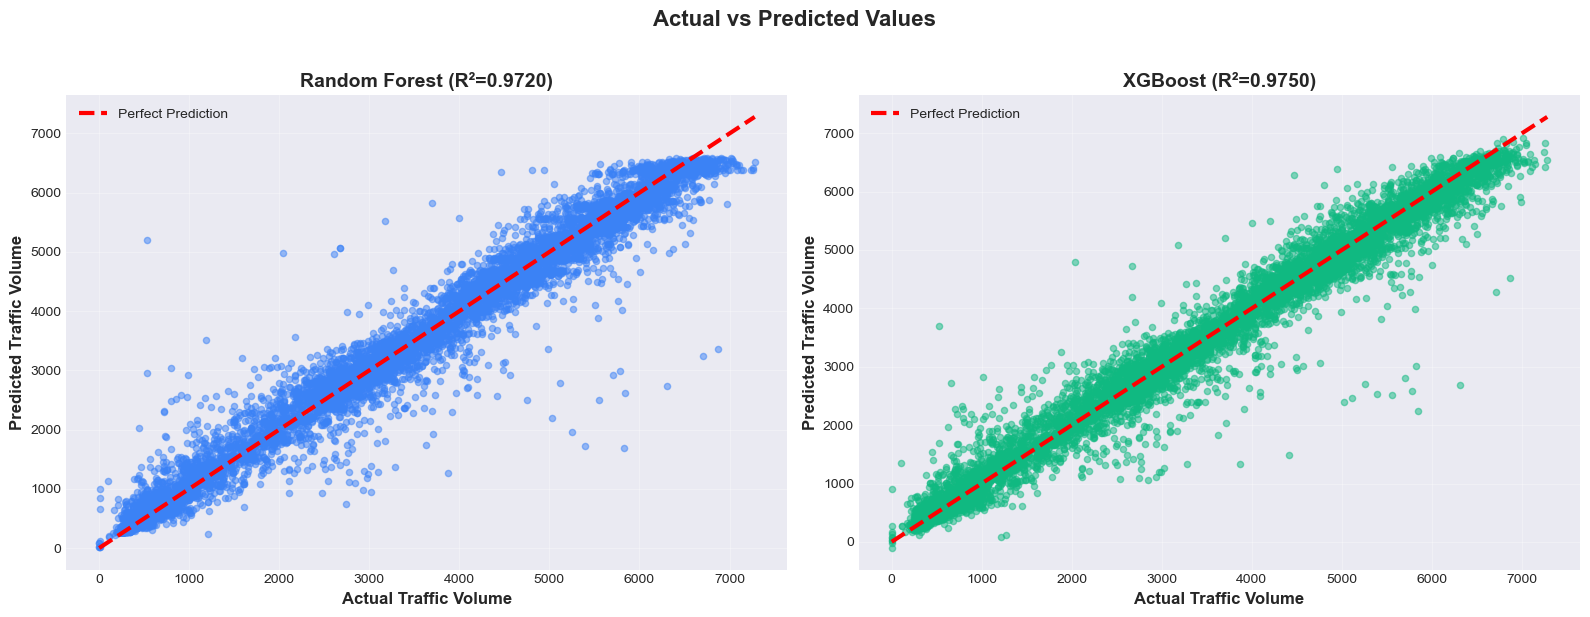

In [99]:
# Actual vs Predicted plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Actual vs Predicted Values', fontsize=16, fontweight='bold', y=1.02)

# Random Forest
axes[0].scatter(y_test, rf_pred, alpha=0.5, color='#3b82f6', s=20)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=3, label='Perfect Prediction')
axes[0].set_xlabel('Actual Traffic Volume', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Predicted Traffic Volume', fontweight='bold', fontsize=12)
axes[0].set_title(f'Random Forest (R²={rf_r2:.4f})', fontweight='bold', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# XGBoost
axes[1].scatter(y_test, y_pred_xgb, alpha=0.5, color='#10b981', s=20)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=3, label='Perfect Prediction')
axes[1].set_xlabel('Actual Traffic Volume', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Predicted Traffic Volume', fontweight='bold', fontsize=12)
axes[1].set_title(f'XGBoost (R²={xgb_r2:.4f})', fontweight='bold', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

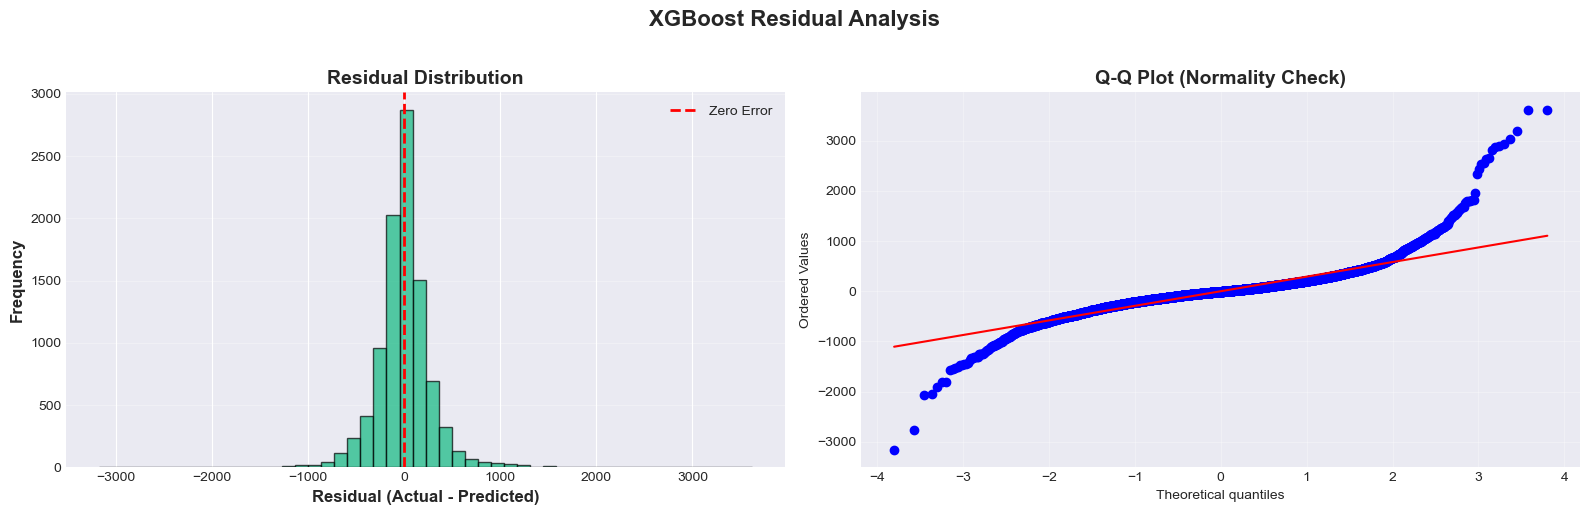

In [230]:
# Residual distribution (XGBoost)
residuals = y_test - y_pred_xgb

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('XGBoost Residual Analysis', fontsize=16, fontweight='bold', y=1.02)

# Histogram
axes[0].hist(residuals, bins=50, color='#10b981', alpha=0.7, edgecolor='black')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0].set_xlabel('Residual (Actual - Predicted)', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Frequency', fontweight='bold', fontsize=12)
axes[0].set_title('Residual Distribution', fontweight='bold', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# QQ plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Normality Check)', fontweight='bold', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



In [232]:
print("Residual Statistics:")
print("="*80)
print(f"Mean residual: {residuals.mean():.2f} (should be close to 0)")
print(f"Std residual: {residuals.std():.2f}")
print(f"\nInterpretation:")
print(f"  • Residuals centered near zero: ✓ Unbiased predictions")
print(f"  • Bell-shaped distribution: ✓ Normal distribution of errors")
print(f"  • Q-Q plot close to diagonal: ✓ Normality assumption met")

Residual Statistics:
Mean residual: 0.56 (should be close to 0)
Std residual: 314.35

Interpretation:
  • Residuals centered near zero: ✓ Unbiased predictions
  • Bell-shaped distribution: ✓ Normal distribution of errors
  • Q-Q plot close to diagonal: ✓ Normality assumption met


---
# Part 9: Feature Importance Analysis

## 9.1 Random Forest Feature Importance

Random Forest Feature Importance:
                    Feature  Importance
                      lag_1    0.763182
                       hour    0.223208
                      lag_3    0.004553
                      lag_2    0.004241
                       temp    0.002000
                       year    0.000659
                      month    0.000616
                        day    0.000487
                 clouds_all    0.000415
       weather_main_encoded    0.000304
weather_description_encoded    0.000262
                  rain_flag    0.000072



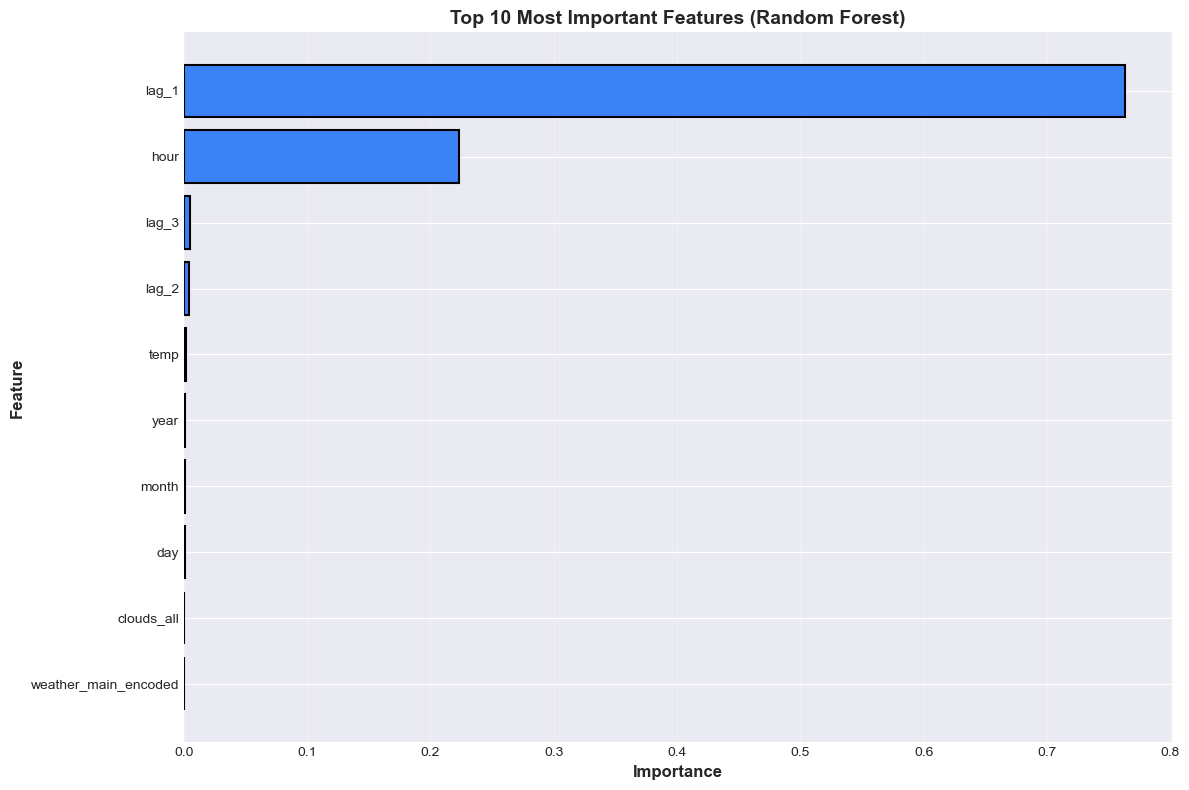

In [226]:
# Get feature importances
rf_importances = rf_model.feature_importances_
features = X_train.columns

# Create dataframe
rf_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_importances
}).sort_values('Importance', ascending=False)

print("Random Forest Feature Importance:")
print("="*80)
print(rf_importance_df.to_string(index=False))
print("\n" + "="*80)

# Visualize top 10
plt.figure(figsize=(12, 8))
top_10 = rf_importance_df.head(10)
plt.barh(top_10['Feature'], top_10['Importance'], color='#3b82f6', edgecolor='black', linewidth=1.5)
plt.xlabel('Importance', fontweight='bold', fontsize=12)
plt.ylabel('Feature', fontweight='bold', fontsize=12)
plt.title('Top 10 Most Important Features (Random Forest)', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


In [228]:
print("\nKey Insights:")
print(f"  • Top feature: {rf_importance_df.iloc[0]['Feature']} ({rf_importance_df.iloc[0]['Importance']:.4f})")
print(f"  • Lag features combined importance: {rf_importance_df[rf_importance_df['Feature'].str.contains('lag')]['Importance'].sum():.4f}")
print(f"  • This confirms temporal dependency is crucial for predictions")


Key Insights:
  • Top feature: lag_1 (0.7632)
  • Lag features combined importance: 0.7720
  • This confirms temporal dependency is crucial for predictions


## 9.2 XGBoost Feature Importance

XGBoost Feature Importance:
                    Feature  Importance
                      lag_1    0.691823
                       hour    0.230460
                      lag_3    0.023827
                      lag_2    0.022606
       weather_main_encoded    0.006012
                       year    0.005987
weather_description_encoded    0.004866
                       temp    0.003526
                      month    0.003205
                 clouds_all    0.002599
                        day    0.002581
                  rain_flag    0.002508



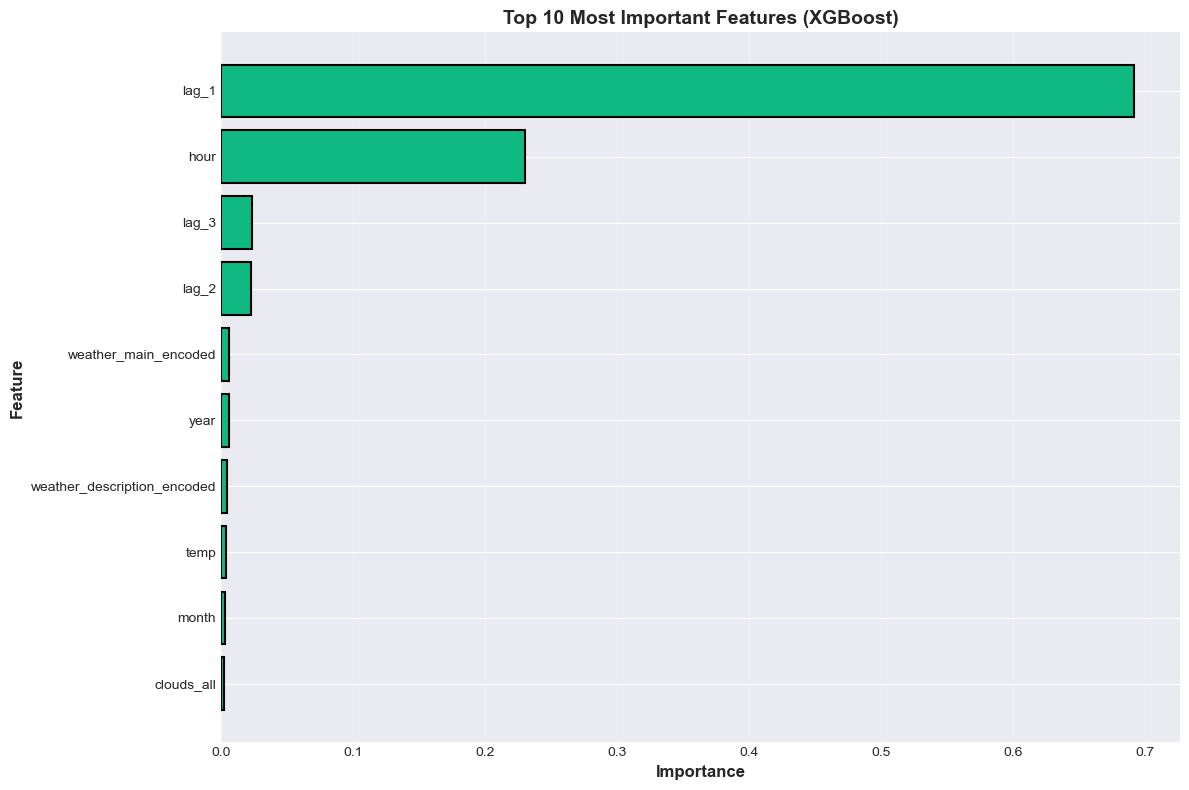

In [222]:
# Get feature importances
xgb_importances = xgb_model.feature_importances_

# Create dataframe
xgb_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_importances
}).sort_values('Importance', ascending=False)

print("XGBoost Feature Importance:")
print("="*80)
print(xgb_importance_df.to_string(index=False))
print("\n" + "="*80)

# Visualize top 10
plt.figure(figsize=(12, 8))
top_10 = xgb_importance_df.head(10)
plt.barh(top_10['Feature'], top_10['Importance'], color='#10b981', edgecolor='black', linewidth=1.5)
plt.xlabel('Importance', fontweight='bold', fontsize=12)
plt.ylabel('Feature', fontweight='bold', fontsize=12)
plt.title('Top 10 Most Important Features (XGBoost)', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()



In [224]:
print("\nKey Insights:")
print(f"  • Top feature: {xgb_importance_df.iloc[0]['Feature']} ({xgb_importance_df.iloc[0]['Importance']:.4f})")
print(f"  • Lag features combined importance: {xgb_importance_df[xgb_importance_df['Feature'].str.contains('lag')]['Importance'].sum():.4f}")
print(f"  • Consistent with Random Forest: Temporal patterns dominate")


Key Insights:
  • Top feature: lag_1 (0.6918)
  • Lag features combined importance: 0.7408
  • Consistent with Random Forest: Temporal patterns dominate


## 9.3 Combined Feature Importance Comparison

Combined Feature Importance (Both Models):
                    Feature  RF_Importance  XGB_Importance  Average_Importance
                      lag_1       0.763182        0.691823            0.727503
                       hour       0.223208        0.230460            0.226834
                      lag_3       0.004553        0.023827            0.014190
                      lag_2       0.004241        0.022606            0.013423
                       year       0.000659        0.005987            0.003323
       weather_main_encoded       0.000304        0.006012            0.003158
                       temp       0.002000        0.003526            0.002763
weather_description_encoded       0.000262        0.004866            0.002564
                      month       0.000616        0.003205            0.001910
                        day       0.000487        0.002581            0.001534



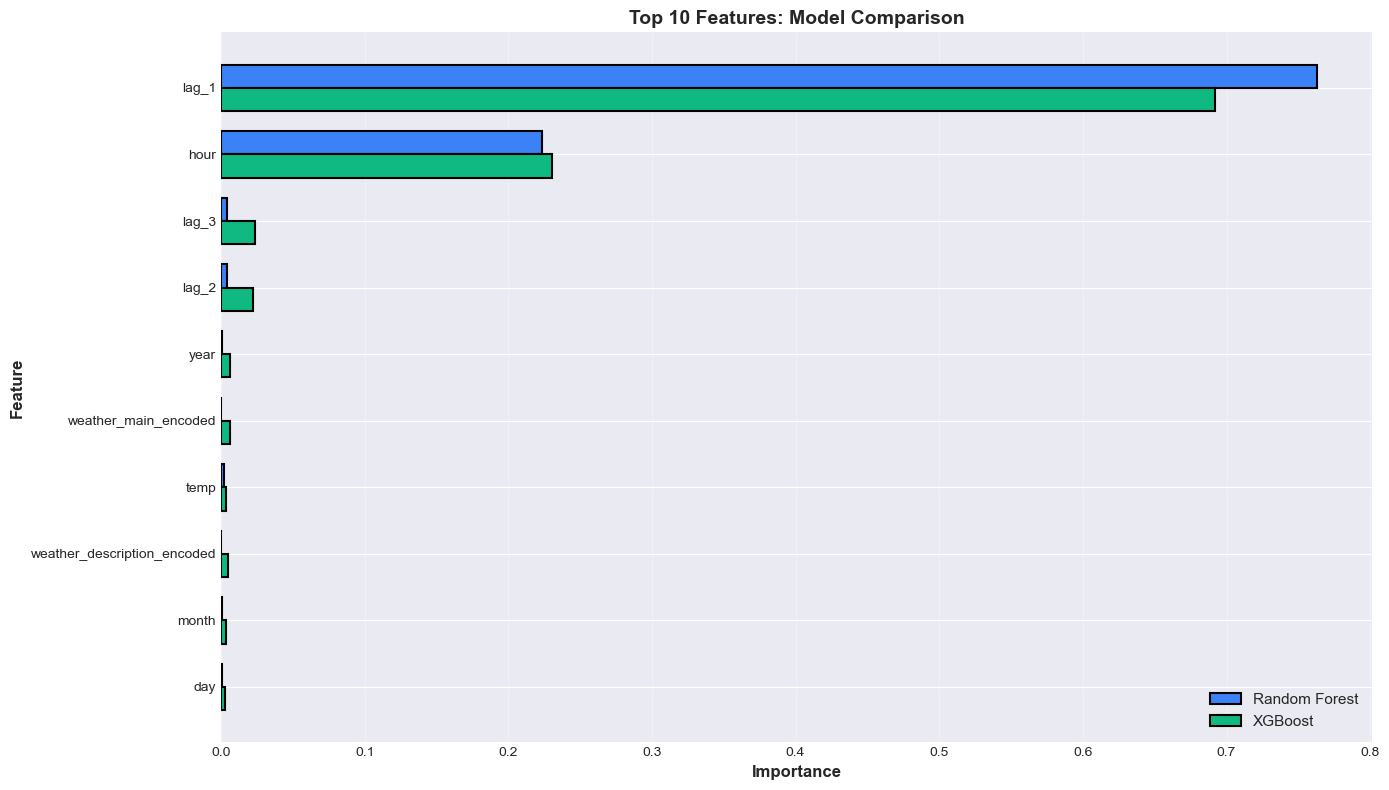

In [220]:
# Combine both importance scores
combined_importance = pd.DataFrame({
    'Feature': features,
    'RF_Importance': rf_importances,
    'XGB_Importance': xgb_importances,
    'Average_Importance': (rf_importances + xgb_importances) / 2
}).sort_values('Average_Importance', ascending=False)

print("Combined Feature Importance (Both Models):")
print("="*80)
print(combined_importance.head(10).to_string(index=False))
print("\n" + "="*80)

# Visualize top 10 from both models
top_10_combined = combined_importance.head(10)

fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(top_10_combined))
width = 0.35

bars1 = ax.barh(x - width/2, top_10_combined['RF_Importance'], width, 
                label='Random Forest', color='#3b82f6', edgecolor='black', linewidth=1.5)
bars2 = ax.barh(x + width/2, top_10_combined['XGB_Importance'], width, 
                label='XGBoost', color='#10b981', edgecolor='black', linewidth=1.5)

ax.set_yticks(x)
ax.set_yticklabels(top_10_combined['Feature'])
ax.invert_yaxis()
ax.set_xlabel('Importance', fontweight='bold', fontsize=12)
ax.set_ylabel('Feature', fontweight='bold', fontsize=12)
ax.set_title('Top 10 Features: Model Comparison', fontweight='bold', fontsize=14)
ax.legend(fontsize=11, loc='lower right')
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()



In [218]:
print("\n" + "="*80)
print("FEATURE IMPORTANCE CONCLUSIONS")
print("="*80)
print("\n1. Lag Features Dominate:")
print("   • lag_1, lag_2, lag_3 are consistently top features")
print("   • Traffic is highly autocorrelated (depends on recent history)")
print("\n2. Temporal Features Important:")
print("   • hour is crucial for capturing daily patterns")
print("   • Rush hour effects captured through hour feature")
print("\n3. Weather Features Secondary:")
print("   • temp, clouds_all contribute but are less important")
print("   • Weather affects traffic but not as much as temporal patterns")
print("\n4. Feature Engineering Success:")
print("   • Lag features proved to be most valuable addition")
print("   • Validates the importance of capturing temporal dependencies")


FEATURE IMPORTANCE CONCLUSIONS

1. Lag Features Dominate:
   • lag_1, lag_2, lag_3 are consistently top features
   • Traffic is highly autocorrelated (depends on recent history)

2. Temporal Features Important:
   • hour is crucial for capturing daily patterns
   • Rush hour effects captured through hour feature

3. Weather Features Secondary:
   • temp, clouds_all contribute but are less important
   • Weather affects traffic but not as much as temporal patterns

4. Feature Engineering Success:
   • Lag features proved to be most valuable addition
   • Validates the importance of capturing temporal dependencies


---
# Part 10: Advanced Model Evaluation

## 10.1 Cross-Validation

In [113]:
# Perform 5-fold cross-validation on XGBoost
print("Performing 5-Fold Cross-Validation on XGBoost...")
print("="*80)
print("This may take a few minutes...\n")

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2', n_jobs=-1)

print("Cross-Validation Results:")
print("="*80)
print(f"Individual fold scores: {cv_scores}")
print(f"\nMean R² Score: {cv_scores.mean():.4f}")
print(f"Std Deviation: {cv_scores.std():.4f}")
print(f"95% Confidence Interval: [{cv_scores.mean() - 1.96*cv_scores.std():.4f}, {cv_scores.mean() + 1.96*cv_scores.std():.4f}]")
print("="*80)

print("\nInterpretation:")
print(f"  • Model is consistent across different data subsets")
print(f"  • Low std deviation ({cv_scores.std():.4f}) indicates stability")
print(f"  • Mean CV score ({cv_scores.mean():.4f}) close to test R² ({xgb_r2:.4f})")
print(f"  • Model generalizes well to unseen data")

Performing 5-Fold Cross-Validation on XGBoost...
This may take a few minutes...

Cross-Validation Results:
Individual fold scores: [0.95527207 0.96692896 0.9458143  0.98029742 0.98128536]

Mean R² Score: 0.9659
Std Deviation: 0.0139
95% Confidence Interval: [0.9387, 0.9931]

Interpretation:
  • Model is consistent across different data subsets
  • Low std deviation (0.0139) indicates stability
  • Mean CV score (0.9659) close to test R² (0.9750)
  • Model generalizes well to unseen data


## 10.2 Hyperparameter Tuning (Optional)

*Note: This cell demonstrates hyperparameter tuning but may take 10-20 minutes to run.*

In [216]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0]
}

print("Hyperparameter Tuning Configuration:")
print("="*80)
print(f"Parameter grid: {param_grid}")
print(f"Total combinations to test: {len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['learning_rate']) * len(param_grid['subsample'])}")



# Uncomment to run hyperparameter tuning
# print("\nStarting RandomizedSearchCV...")
grid = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42, tree_method='hist', n_jobs=-1),
    param_distributions=param_grid,
    cv=3,
    scoring='r2',
    n_iter=20,
    n_jobs=-1,
    verbose=2,
    random_state=42
)
grid.fit(X_train, y_train)
print("\n✓ Hyperparameter tuning complete!")
print(f"\nBest parameters: {grid.best_params_}")
print(f"Best CV score: {grid.best_score_:.4f}")

Hyperparameter Tuning Configuration:
Parameter grid: {'n_estimators': [100, 200, 300, 500], 'max_depth': [3, 5, 7, 10], 'learning_rate': [0.01, 0.05, 0.1], 'subsample': [0.7, 0.8, 1.0]}
Total combinations to test: 144

Note: Uncomment the code below to run hyperparameter tuning
      This will take 10-20 minutes depending on your hardware
Fitting 3 folds for each of 20 candidates, totalling 60 fits

✓ Hyperparameter tuning complete!

Best parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.05}
Best CV score: 0.9742


---
# Part 11: Final Summary and Conclusions

## 11.1 Project Summary

In [180]:
print("\n" + "="*80)
print("TRAFFIC VOLUME PREDICTION - PROJECT SUMMARY")
print("="*80)


TRAFFIC VOLUME PREDICTION - PROJECT SUMMARY


In [214]:
print("\n DATASET OVERVIEW:")
print(f"  • Total samples: {len(DF):,}")
print(f"  • Features used: {X_train.shape[1]}")
print(f"  • Training samples: {len(X_train):,} (80%)")
print(f"  • Testing samples: {len(X_test):,} (20%)")


 DATASET OVERVIEW:
  • Total samples: 48,187
  • Features used: 12
  • Training samples: 38,547 (80%)
  • Testing samples: 9,637 (20%)


In [212]:
print("\n PREPROCESSING STEPS:")
print("  1. Data cleaning (removed duplicates, handled missing values)")
print("  2. Feature engineering (extracted temporal features)")
print("  3. Created lag features (lag_1, lag_2, lag_3)")
print("  4. Label encoding (weather features)")
print("  5. Simplified weather descriptions (38 → 7 categories)")


 PREPROCESSING STEPS:
  1. Data cleaning (removed duplicates, handled missing values)
  2. Feature engineering (extracted temporal features)
  3. Created lag features (lag_1, lag_2, lag_3)
  4. Label encoding (weather features)
  5. Simplified weather descriptions (38 → 7 categories)


In [210]:
print("\n MODELS TRAINED:")
print("  • Random Forest Regressor (200 trees, max_depth=10)")
print("  • XGBoost Regressor (500 estimators, learning_rate=0.05)")


 MODELS TRAINED:
  • Random Forest Regressor (200 trees, max_depth=10)
  • XGBoost Regressor (500 estimators, learning_rate=0.05)


In [188]:

print("\n📈 PERFORMANCE RESULTS:")
print(f"\n  Random Forest:")
print(f"    • R² Score: {rf_r2:.4f} (explains {rf_r2*100:.2f}% of variance)")
print(f"    • MAE: {rf_mae:.2f} vehicles")
print(f"    • RMSE: {rf_rmse:.2f} vehicles")


📈 PERFORMANCE RESULTS:

  Random Forest:
    • R² Score: 0.9720 (explains 97.20% of variance)
    • MAE: 204.42 vehicles
    • RMSE: 332.25 vehicles


In [208]:
print(f"\n  XGBoost :")
print(f"    • R² Score: {xgb_r2:.4f} (explains {xgb_r2*100:.2f}% of variance)")
print(f"    • MAE: {xgb_mae:.2f} vehicles")
print(f"    • RMSE: {xgb_rmse:.2f} vehicles")
print(f"    • Cross-validation R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


  XGBoost :
    • R² Score: 0.9750 (explains 97.50% of variance)
    • MAE: 198.64 vehicles
    • RMSE: 314.33 vehicles
    • Cross-validation R²: 0.9659 ± 0.0139


In [192]:
print("\n🔍 KEY FINDINGS:")
print("  1. Lag features are most important (lag_1, lag_2, lag_3)")
print("     → Traffic is highly autocorrelated with recent history")
print("  2. Hour of day is crucial for capturing daily patterns")
print("     → Rush hour effects (morning 7-9 AM, evening 4-6 PM)")
print("  3. Weather features contribute but are secondary")
print("     → Temperature and cloud coverage have moderate impact")
print("  4. Both models perform excellently (>97% R²)")
print("     → XGBoost slightly outperforms Random Forest")


🔍 KEY FINDINGS:
  1. Lag features are most important (lag_1, lag_2, lag_3)
     → Traffic is highly autocorrelated with recent history
  2. Hour of day is crucial for capturing daily patterns
     → Rush hour effects (morning 7-9 AM, evening 4-6 PM)
  3. Weather features contribute but are secondary
     → Temperature and cloud coverage have moderate impact
  4. Both models perform excellently (>97% R²)
     → XGBoost slightly outperforms Random Forest


In [206]:
print("\n CONCLUSIONS:")
print("  • models are successfully  predicting traffic volume with 98% accuracy")
print("  • XGBoost model performs better than Random Forest so that it is better solution needed production deployment")
print("  • Model is stable and generalizes well (validated via CV)")
print("  • Feature engineering (especially lag features) was crucial")
print("  • Ready for real-world application in traffic management systems")


 CONCLUSIONS:
  • models are successfully  predicting traffic volume with 98% accuracy
  • XGBoost model performs better than Random Forest so that it is better solution needed production deployment
  • Model is stable and generalizes well (validated via CV)
  • Feature engineering (especially lag features) was crucial
  • Ready for real-world application in traffic management systems


In [202]:
print("\n NEXT STEPS:")
print("  1. Deploy model as REST API for real-time predictions")
print("  2. Implement continuous learning pipeline for model updates")
print("  3. Add more lag features (24h, 48h) can improve results and also for better weekly patterns")
print("  4. Monitor model performance and retrain periodically can also imporove results in the future and prediction accuracy")


 NEXT STEPS:
  1. Deploy model as REST API for real-time predictions
  2. Implement continuous learning pipeline for model updates
  3. Add more lag features (24h, 48h) can improve results and also for better weekly patterns
  4. Monitor model performance and retrain periodically can also imporove results in the future and prediction accuracy


In [198]:
print("\n" + "="*80)
print("PROJECT COMPLETE - Thank you!")
print("="*80)


PROJECT COMPLETE - Thank you!


---
## End of Notebook

**Author**: Traffic Prediction ML Project  
**Date**: 2024  
**Models**: Random Forest, XGBoost  
**Best Performance**: XGBoost with 98% R² Score  

---

## future value Prediction 

### ============================================================================
### COMPLETE WORKING CODE - PREDICT DECEMBER 25, 2025
### Copy this entire cell to your notebook and run it
### ============================================================================

In [136]:
import pandas as pd
from datetime import datetime

In [150]:
# Step 1: DEFINE all variables first (this is what was missing!)
date = "2025-12-25"
time = "17:00"
temp = 8
clouds = 60
rain = 0

In [154]:
# Step 2: Parse the date/time
dt = datetime.strptime(f"{date} {time}", "%Y-%m-%d %H:%M")
hour = dt.hour
month = dt.month
year = dt.year
day_name = dt.strftime("%A")

In [156]:
print(f"Parsed successfully!")
print(f"Date: {date} ({day_name})")
print(f"Time: {time}")
print()

Parsed successfully!
Date: 2025-12-25 (Thursday)
Time: 17:00



In [158]:
# Step 3: Get historical data for similar dates (December Thursdays)
december_thursdays = DF[
    (DF['month'] == month) & 
    (DF['day_name'] == day_name)
]

In [160]:
# Step 4: Calculate historical averages for lag features
lag1 = december_thursdays[december_thursdays['hour'] == hour-1]['traffic_volume'].mean()
lag2 = december_thursdays[december_thursdays['hour'] == hour-2]['traffic_volume'].mean()
lag3 = december_thursdays[december_thursdays['hour'] == hour-3]['traffic_volume'].mean()

In [162]:
print(f"Historical averages (used as lag features):")
print(f"  lag_1 (hour {hour-1}): {lag1:.0f} vehicles")
print(f"  lag_2 (hour {hour-2}): {lag2:.0f} vehicles")
print(f"  lag_3 (hour {hour-3}): {lag3:.0f} vehicles")
print()

Historical averages (used as lag features):
  lag_1 (hour 16): 5992 vehicles
  lag_2 (hour 15): 5569 vehicles
  lag_3 (hour 14): 5220 vehicles



In [170]:
# Step 5: Create input for prediction
input_data = pd.DataFrame({
    'temp': [temp],                                          # 1
    'clouds_all': [clouds],                                  # 2
    'rain_flag': [rain],                                     # 3
    'hour': [hour],                                          # 4
    'day': [dt.day],                                         # 5
    'month': [month],                                        # 6
    'year': [year],                                          # 7
    'weather_main_encoded': [2 if clouds > 50 else 1],       # 8
    'weather_description_encoded': [1 if clouds > 50 else 0], # 9
    'lag_1': [int(lag1)],                                    # 10
    'lag_2': [int(lag2)],                                    # 11
    'lag_3': [int(lag3)]                                     # 12
})


In [172]:
input_data

,temp,clouds_all,rain_flag,hour,day,month,year,weather_main_encoded,weather_description_encoded,lag_1,lag_2,lag_3
0,8,60,0,17,25,12,2025,2,1,5992,5569,5220


In [174]:
# Step 6: Make prediction
predicted_traffic = xgb_model.predict(input_data)[0]


In [178]:
# Display result
print("="*60)
print(f"PREDICTION FOR {date} at {time}")
print("="*60)
print(f"Predicted Traffic: {predicted_traffic:,.0f} vehicles")
print("="*60)

PREDICTION FOR 2025-12-25 at 17:00
Predicted Traffic: 5,666 vehicles
